In [1]:
import copy
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.serif"] = 'Times'
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["legend.fontsize"] = 18
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["mathtext.it"] = "serif:italic"
plt.rcParams["mathtext.bf"] = "serif:bold"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['text.usetex'] = True
from matplotlib.colors import LogNorm
#need this for the colourbar of the 2D histogram


from DataAnalysis import DataAnalysis

In [2]:
data = DataAnalysis()
data.load_eventdf('data/new_moo/4-1/events.csv')
data.load_clusterdf('data/new_moo/4-1/clusters.csv')

data.filter_fit(3.5,5)

In [3]:
data.get_eventdf()

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,MaxTime,Cluster,Hit,PathLength,dEdx
0,350259,939,5113.888,1,3.372999,3.003,33036.285200,-4561.932200,14187.866801,41424.228129,True,5116.891,0,True,55.096849,599.603898
1,350259,951,5113.880,1,3.151048,3.130,24272.779521,-3584.269948,9211.181112,29860.426977,False,5117.010,0,True,22.189207,1093.900279
2,350259,938,5113.912,1,3.185699,3.177,8266.641855,-3320.831253,4528.308823,11071.533859,False,5117.089,0,True,9.627347,858.662458
3,350259,817,5113.928,1,3.187840,3.186,3151.012640,-5405.239583,3030.258657,4430.434279,False,5117.114,0,True,3.821740,824.496837
4,350259,819,5113.880,1,3.179386,3.236,30216.037883,-6519.608943,16090.028254,36025.165653,True,5117.116,0,True,47.281772,639.063139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,350292,188,2752770.472,1,3.161385,3.154,6020.954799,-5545.251119,5881.226766,8370.961374,False,2752773.626,506,True,0.858624,7012.328315
8242,350292,862,2752770.472,1,3.165121,3.166,4193.430727,-4294.785187,3760.220215,5793.819591,False,2752773.638,506,False,NaN,NaN
8243,350292,135,2752770.440,1,3.156190,3.522,23222.366447,-3751.939545,13384.122620,28707.965042,True,2752773.962,506,True,1.000534,23209.982083
8244,350292,174,2752770.448,1,3.339998,3.669,28595.261905,-6665.503657,16284.629023,37640.714459,True,2752774.117,506,True,31.597331,904.989792


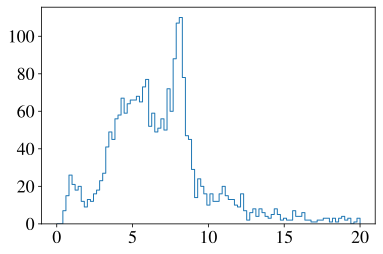

In [4]:
array = plt.hist(data.get_eventdf()['dEdx']/100, np.linspace(0,20,100), histtype='step')

In [5]:
#plt.scatter(data.get_cluster(large_non_sats)['PathLength'], data.get_cluster(large_non_sats)['SelectedEnergy'],s=.1)



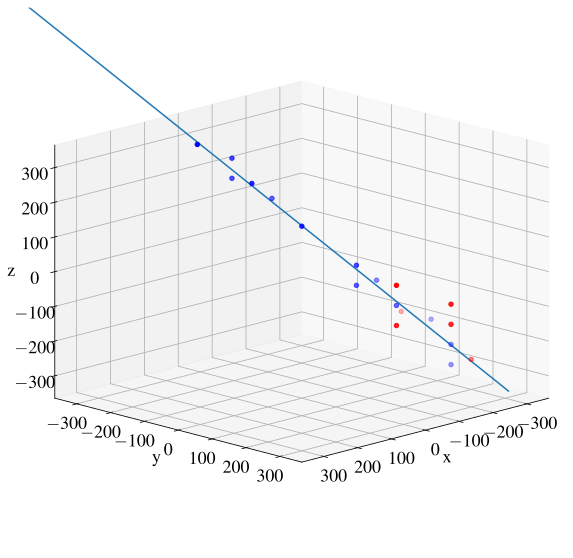

In [6]:
data.show_cluster(76)

In [7]:
data.get_eventdf()[data.get_eventdf()["Time"] == 1771190.768]

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,MaxTime,Cluster,Hit,PathLength,dEdx


In [8]:
large_non_sats = []
for c in data.get_clusterdf()['Cluster'].values:
    cluster = data.get_cluster(c)
    #r2 = data.get_clusterdf()[data.get_clusterdf()['Cluster'] == c]['dEdx_err'].values[0]
    
    if len(cluster[(cluster['IsSaturated']==False) & (cluster['Hit'])==True]) >=4 :
        large_non_sats.append(c)

np.array(large_non_sats)

array([  5,   8,  10,  11,  59,  66,  72,  76,  89,  90, 108, 109, 112,
       121, 129, 130, 132, 144, 152, 155, 156, 161, 162, 163, 165, 167,
       171, 175, 177, 183, 187, 193, 196, 207, 216, 217, 222, 230, 232,
       233, 234, 237, 254, 264, 273, 286, 290, 298, 301, 309, 320, 321,
       330, 343, 357, 365, 368, 376, 377, 380, 384, 387, 388, 390, 391,
       407, 409, 410, 411, 419, 427, 435, 442, 448, 454, 455, 456, 464,
       465, 469, 472, 480, 489, 492])

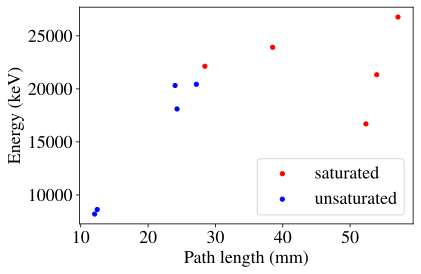

In [9]:
c = 156

# plt.title("Path length vs Energy Deposition: Cluster " + str(c))
plt.xlabel("Path length (mm)")
plt.ylabel("Energy (keV)")
saturated = data.get_cluster(c)[data.get_cluster(c)['IsSaturated'] == True]
unsaturated = data.get_cluster(c)[data.get_cluster(c)['IsSaturated'] == False]
plt.scatter(saturated['PathLength'], saturated['SelectedEnergy'], c='red', label="saturated", s=18)
plt.scatter(unsaturated['PathLength'], unsaturated['SelectedEnergy'], c='blue', label="unsaturated", s=18)
plt.legend()

plt.savefig('plots/png/CUORE_Reconstructed_Event_' + str(c) + '.png',dpi=300,bbox_inches = "tight")
plt.savefig('plots/pdf/CUORE_Reconstructed_Event_' + str(c) + '.pdf',bbox_inches = "tight")
# fitline = data.get_clusterdf()[data.get_clusterdf()['Cluster'] == c]['Fitline'].values[0]
# data.dEdx(data.get_cluster(c), fitline, show_graph=True)

In [19]:
data.get_cluster(c)[data.get_cluster(c)['IsSaturated']==True]['Channel']

2136    778
2137    751
2142    418
2145    407
2146    383
Name: Channel, dtype: int64

In [20]:
from Helper import *

coords = load_coords('.')
all_channels = np.array(range(1,989)) #np.random.choice(list(range(1,989)),20, replace=False)
hit_channels = np.array(data.get_cluster(c)['Channel'])
sat_channels = np.array(data.get_cluster(c)[data.get_cluster(c)['IsSaturated']==True]['Channel'])
unsat_channels = np.array(data.get_cluster(c)[data.get_cluster(c)['IsSaturated']==False]['Channel'])

other_channels = all_channels[np.isin(all_channels,hit_channels,invert=True)]

hit_positions = np.array([coords[ch] for ch in hit_channels]).T
sat_positions = np.array([coords[ch] for ch in sat_channels]).T
unsat_positions = np.array([coords[ch] for ch in unsat_channels]).T

other_positions = np.array([coords[ch] for ch in other_channels]).T

line = data.get_clusterdf()[data.get_clusterdf()['Cluster'] == c]['Fitline'].values[0]
linepts = line_to_pts(line)

import numpy as np
from mayavi import mlab
import matplotlib.pyplot as py

# crystal_positions = np.genfromtxt('CUORE_Crystal_Positions.txt',
#                                   names=['Channel','X','Y','Z'])

fig = mlab.figure(1,size=(600,600),fgcolor=(1,1,1),bgcolor=(1,1,1))
mlab.clf()


mlab.points3d(sat_positions[0],
              sat_positions[1],
              sat_positions[2],
              mode='cube',
              scale_factor=50,
              opacity=.7,
              color=(1,0,0))

mlab.points3d(unsat_positions[0],
              unsat_positions[1],
              unsat_positions[2],
              mode='cube',
              scale_factor=50,
              opacity=.7,
              color=(0,0,1))

mlab.points3d(other_positions[0],
              other_positions[1],
              other_positions[2],
              mode='cube',
              scale_factor=50,
              opacity=.1,
              color=(1,1,1))

mlab.plot3d(linepts.T[0],
            linepts.T[1],
            linepts.T[2],
            color=(0,0,0),
            #line_width=100.0,
            tube_radius=1.0)

mlab.show()

In [21]:
data.get_cluster(c)

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,MaxTime,Cluster,Hit,PathLength,dEdx
2136,350267,778,673767.424,1,3.126285,2.989,16697.701758,-1622.648229,11101.263036,2.079963e+04,True,673770.413,156,True,52.353318,318.942569
2137,350267,751,673767.440,1,3.167810,2.994,21330.805024,-3560.036123,13034.725606,2.194141e+05,True,673770.434,156,True,53.960286,395.305630
2138,350267,395,673767.464,1,3.139353,3.119,18105.746540,-4947.265986,6832.062129,2.348291e+04,False,673770.583,156,True,24.301806,745.037082
2139,350267,419,673767.472,1,3.138308,3.130,8622.310114,-5977.627975,3003.594620,1.103664e+04,False,673770.602,156,True,12.438414,693.200141
2140,350267,382,673767.480,1,3.156837,3.140,20317.450037,-4005.385523,12765.906459,2.656586e+04,False,673770.620,156,True,24.011352,846.160175
2141,350267,750,673767.480,1,3.179711,3.152,20433.325377,-4363.935644,13249.345952,9.999999e+06,False,673770.632,156,True,27.165009,752.192848
2142,350267,418,673767.488,1,3.170900,3.153,23918.969231,-5816.454727,14818.262894,3.028347e+04,True,673770.641,156,True,38.497391,621.314027
2143,350267,410,673767.488,1,3.163551,3.154,4939.991858,-4778.886983,4083.543966,6.671739e+03,False,673770.642,156,False,NaN,NaN
2144,350267,779,673767.480,1,3.196520,3.186,8197.561340,-4591.749776,5603.201497,9.999999e+06,False,673770.666,156,True,12.062797,679.573866
2145,350267,407,673767.480,1,3.178874,3.586,22133.026452,-3702.541031,13315.578140,2.800455e+04,True,673771.066,156,True,28.434634,778.382680


Text(0, 0.5, 'Occurance')

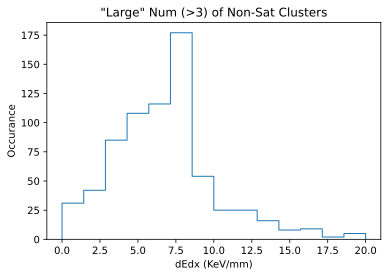

In [12]:
df = data.get_eventdf()[data.get_eventdf()['Cluster'].isin(large_non_sats)]

#array = plt.hist(data.get_clusterdf()['dEdx'], np.linspace(0,2000,20), histtype='step')
array = plt.hist(df['dEdx']/100, np.linspace(0,20,15),histtype='step')
#plt.axvline(811, color='black', label='dE/dx=8.11 MeV/cm')

plt.title("\"Large\" Num (>3) of Non-Sat Clusters")
plt.xlabel("dEdx (KeV/mm)")
plt.ylabel("Occurance")
#plt.legend()

Text(0.5, 0, 'Pathlength (mm)')

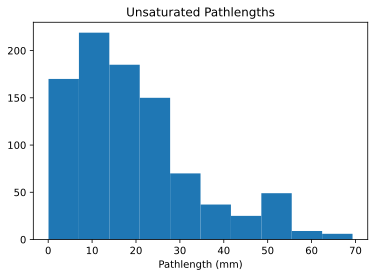

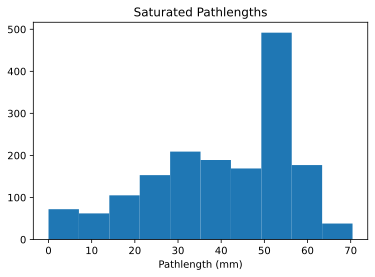

In [13]:
plt.figure()
array = plt.hist(data.get_eventdf()[(data.get_eventdf()['IsSaturated']==False) & (data.get_eventdf()['Hit']==True)]['PathLength'])
plt.title("Unsaturated Pathlengths")
plt.xlabel("Pathlength (mm)")

plt.figure()
array = plt.hist(data.get_eventdf()[(data.get_eventdf()['IsSaturated']==True) & (data.get_eventdf()['Hit']==True)]['PathLength'])

plt.title("Saturated Pathlengths")
plt.xlabel("Pathlength (mm)")



In [14]:
noisydata = copy.deepcopy(data)

In [15]:
#data.filter_noisy()

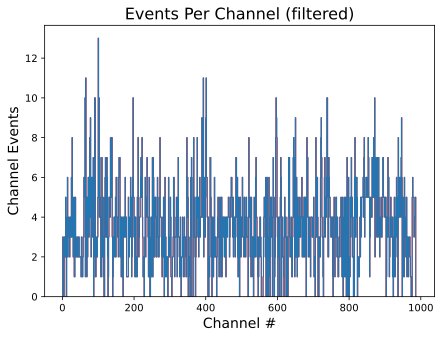

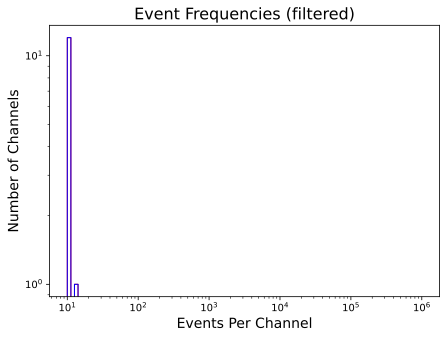

In [16]:
plt.figure(figsize=(7,5)) # lets you make a custom size for your plot
array1=plt.hist(noisydata.get_eventdf()['Channel'].values, np.linspace(0,989,990) , histtype='step', color='r')#np.linspace function is hlepful for generating bins
array2=plt.hist(data.get_eventdf()['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
plt.title("Events Per Channel (filtered)", fontsize=16)
plt.xlabel('Channel #',fontsize=14)
plt.ylabel('Channel Events',fontsize=14)
#plt.gca().set_yscale("log")
#plt.ylim(1,200)


#plt.savefig('plots/pdf/EventsPerChannel.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventsPerChannel.png',dpi=300,bbox_inches = "tight")


plt.figure(figsize=(7,5))
plt.hist(array1[0], np.logspace(1,6,100), histtype='step', color='r')
plt.hist(array2[0], np.logspace(1,6,100),color='b', histtype='step')
plt.title("Event Frequencies (filtered)",fontsize=16)
plt.xlabel('Events Per Channel',fontsize=14)
plt.ylabel('Number of Channels',fontsize=14)
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")


#plt.savefig('plots/pdf/EventFrequency.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventFrequency.png',dpi=300,bbox_inches = "tight")

In [17]:
quietdata = copy.deepcopy(data)

In [18]:
#data.filter_baseline()

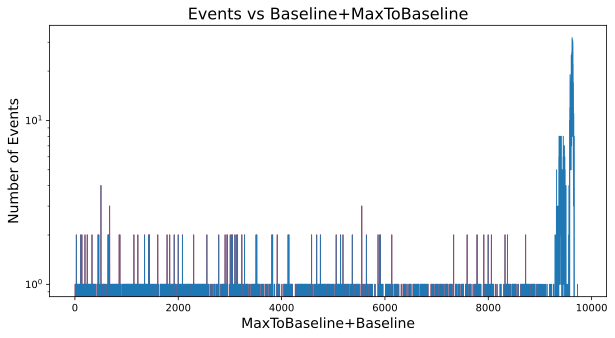

In [19]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Events vs Baseline+MaxToBaseline", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['MaxToBaseline'].values+data.get_eventdf()['Baseline'].values, np.linspace(0,9800,9801), histtype='step')
plt.gca().set_yscale("log")

plt.savefig('plots/pdf/Baseline_MaxToBaseline.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Baseline_MaxToBaseline.png',dpi=300,bbox_inches = "tight")

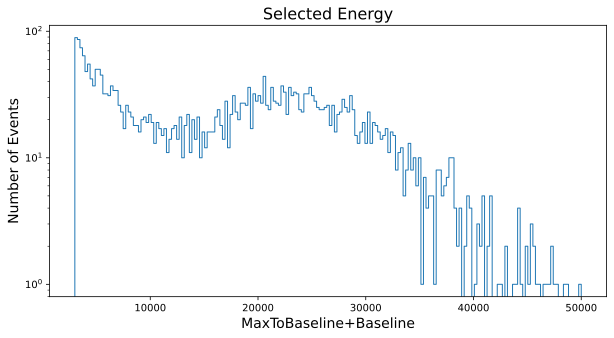

In [20]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Selected Energy", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
#plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['SelectedEnergy'].values, np.linspace(3000,50000,200), histtype='step')
#array=plt.hist(data.get_cluster(0)['SelectedEnergy'].values, np.linspace(3000,50000,200), histtype='step')


plt.gca().set_yscale("log")


In [21]:
#data = DataAnalysis(load=True, eventfile='data/big_boi/bigeventdf.csv', clusterfile='data/big_boi/bigclusterdf.csv')

In [22]:
#event_threshold = 5
#time_threshold = 1

#data.arrange_clusters(event_threshold, time_threshold)
#data.make_clusterDF()

In [23]:
messydata = copy.deepcopy(data)

In [24]:
messydata.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Likelihood,Fitline
0,0,7,7,5116.891,0.490,0.921579,0.433520,-0.911930,1,0,-30.130987,"[-27.928537, -181.318589, 313.701237, -0.40377..."
1,1,6,6,7194.337,0.502,0.708974,0.395736,-0.854340,0,0,-39.672138,"[108.692342, 48.556661, 220.56836, -0.376041, ..."
3,3,6,5,26158.403,0.232,0.952443,0.432960,0.084022,0,0,-34.392469,"[328.017823, -103.96832, 158.983972, -0.316386..."
4,4,6,6,27250.906,1.288,1.032656,0.991894,-1.033256,0,0,-16.289905,"[128.960797, 260.404325, -350.202956, 0.770742..."
5,5,6,6,29660.033,0.226,1.214987,0.604863,0.598183,0,0,-23.637915,"[180.616165, -263.010247, 38.05189, 0.189694, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
489,500,11,8,2710760.519,0.903,2.239454,0.598001,-0.701957,7,5,-29.631798,"[315.496488, 150.400011, -322.012913, -0.56163..."
491,502,11,11,2728511.764,0.730,0.949917,0.555526,-1.384422,1,0,-61.806910,"[-39.575322, -260.850648, 276.787259, -0.38519..."
493,504,8,8,2747006.328,0.537,0.929335,1.168293,1.125557,0,0,-34.794364,"[-37.346766, 345.527824, -161.001273, 0.171297..."
494,505,5,5,2747961.339,0.108,1.498858,0.660050,0.615046,0,2,-9.615213,"[-297.750902, -189.652652, -296.730685, 0.1947..."


In [25]:
print("Messy cluster rate: " + str(messydata.get_clusterrate()))
data.filter_fit(3.5, 5) #(NRMSE, channels)
print("Filtered cluster rate: " + str(data.get_clusterrate()))

clusters: 344
run time: 2636943.0
Messy cluster rate: 0.00013045409020976184
clusters: 344
run time: 2636943.0
Filtered cluster rate: 0.00013045409020976184


In [26]:
data.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Likelihood,Fitline
0,0,7,7,5116.891,0.490,0.921579,0.433520,-0.911930,1,0,-30.130987,"[-27.928537, -181.318589, 313.701237, -0.40377..."
1,1,6,6,7194.337,0.502,0.708974,0.395736,-0.854340,0,0,-39.672138,"[108.692342, 48.556661, 220.56836, -0.376041, ..."
3,3,6,5,26158.403,0.232,0.952443,0.432960,0.084022,0,0,-34.392469,"[328.017823, -103.96832, 158.983972, -0.316386..."
4,4,6,6,27250.906,1.288,1.032656,0.991894,-1.033256,0,0,-16.289905,"[128.960797, 260.404325, -350.202956, 0.770742..."
5,5,6,6,29660.033,0.226,1.214987,0.604863,0.598183,0,0,-23.637915,"[180.616165, -263.010247, 38.05189, 0.189694, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
489,500,11,8,2710760.519,0.903,2.239454,0.598001,-0.701957,7,5,-29.631798,"[315.496488, 150.400011, -322.012913, -0.56163..."
491,502,11,11,2728511.764,0.730,0.949917,0.555526,-1.384422,1,0,-61.806910,"[-39.575322, -260.850648, 276.787259, -0.38519..."
493,504,8,8,2747006.328,0.537,0.929335,1.168293,1.125557,0,0,-34.794364,"[-37.346766, 345.527824, -161.001273, 0.171297..."
494,505,5,5,2747961.339,0.108,1.498858,0.660050,0.615046,0,2,-9.615213,"[-297.750902, -189.652652, -296.730685, 0.1947..."


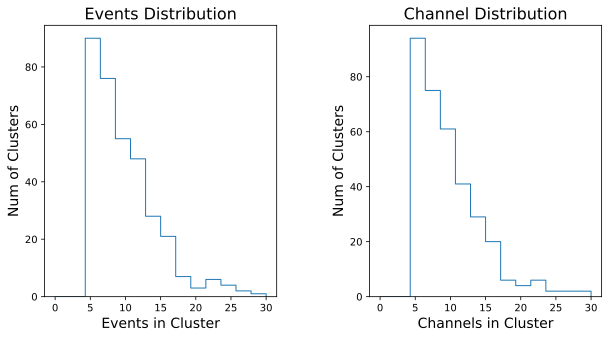

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

ax1.set_title("Events Distribution", fontsize=16)
ax1.set_xlabel("Events in Cluster", fontsize=14)
ax1.set_ylabel("Num of Clusters", fontsize=14)
#ax1.hist(messydata.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step', color='r')
ax1.hist(data.get_clusterdf()["Events"], np.linspace(0,30,15), histtype='step')



ax2.set_title("Channel Distribution", fontsize=16)
ax2.set_xlabel("Channels in Cluster", fontsize=14)
ax2.set_ylabel("Num of Clusters", fontsize=14)
#ax2.hist(messydata.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step', color='r')
array = ax2.hist(data.get_clusterdf()["Channels"], np.linspace(0,30,15), histtype='step')


plt.savefig('plots/pdf/Event+Channel_Dist.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Event+Channel_Dist.png',dpi=300,bbox_inches = "tight")

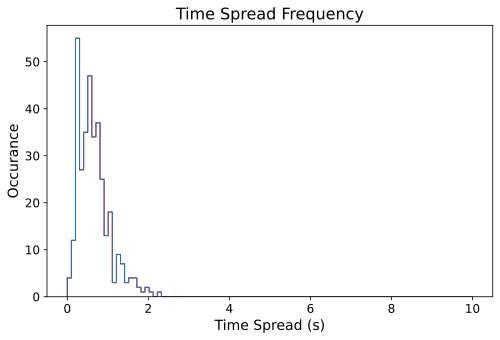

In [28]:
plt.figure(figsize=(8,5))
array = plt.hist(messydata.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step', color='r')
array = plt.hist(data.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step')
plt.title("Time Spread Frequency", fontsize=16)
plt.xlabel("Time Spread (s)", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks

#plt.ylim(0,50)

#plt.savefig('plots/pdf/Pre_TimeSpread.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_TimeSpread.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Time Spread Frequency (filtered)", fontsize=16)
#plt.xlabel("Time Spread (s)", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.ylim(0,50)

plt.savefig('plots/pdf/TimeSpread.pdf',bbox_inches = "tight")
plt.savefig('plots/png/TimeSpread.png',dpi=300,bbox_inches = "tight")

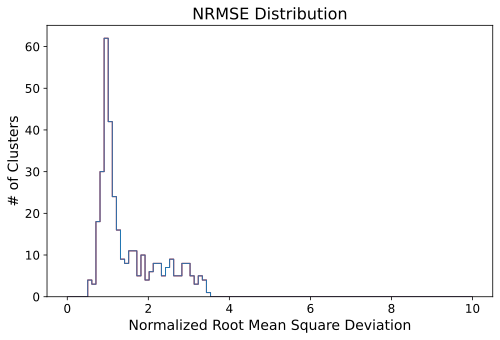

In [29]:
plt.figure(figsize=(8,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=16)
plt.ylabel('# of Clusters',fontsize=14)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=14)

array=plt.hist(messydata.get_clusterdf()['NRMSE'], np.linspace(0,10,100), histtype='step', color='r')
array=plt.hist(data.get_clusterdf()['NRMSE'], np.linspace(0,10,100), histtype='step')

#line = plt.axvline(1)

plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")


#############################################################################################################
#
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title("Filtered NRMSE Distribution", fontsize=18)
#plt.ylabel('# of Clusters',fontsize=16)
#plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')


#line=plt.axvline(1)
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")

In [30]:
len(data.get_clusterdf())/len(messydata.get_clusterdf())

1.0

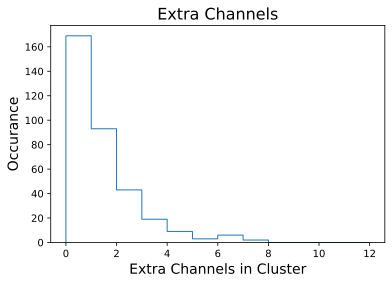

In [31]:
plt.figure()
plt.title("Extra Channels", fontsize=16)
plt.xlabel("Extra Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

#array = plt.hist(messydata.get_clusterdf()['ExtraCh'], np.linspace(0,12,13), color='r', histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Pre_ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_ExtraChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Extra Channels (filtered)", fontsize=16)
#plt.xlabel("Extra Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

array = plt.hist(data.get_clusterdf()['ExtraCh'], np.linspace(0,12,13), histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/ExtraChannels.png',dpi=300,bbox_inches = "tight")

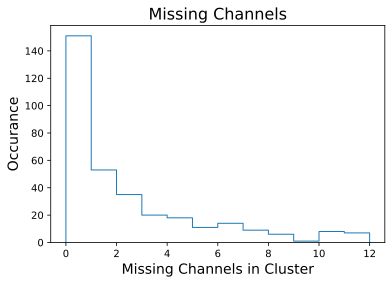

In [32]:
plt.figure()
plt.title("Missing Channels", fontsize=16)
plt.xlabel("Missing Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
#array = plt.hist(messydata.get_clusterdf()['MissingCh'], np.linspace(0,12,13), color='r', histtype='step')

#plt.savefig('plots/pdf/Pre_MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_MissingChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Missing Channels (filtered)", fontsize=16)
#plt.xlabel("Missing Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)
array = plt.hist(data.get_clusterdf()['MissingCh'], np.linspace(0,12,13), histtype='step')

#plt.savefig('plots/pdf/MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/MissingChannels.png',dpi=300,bbox_inches = "tight")


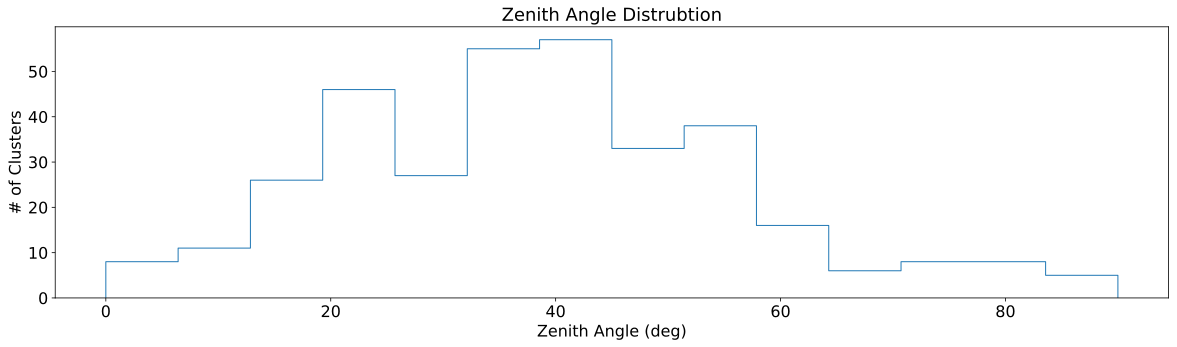

In [33]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (deg)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Zenith'].values], np.linspace(0,90,15), histtype='step')

plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

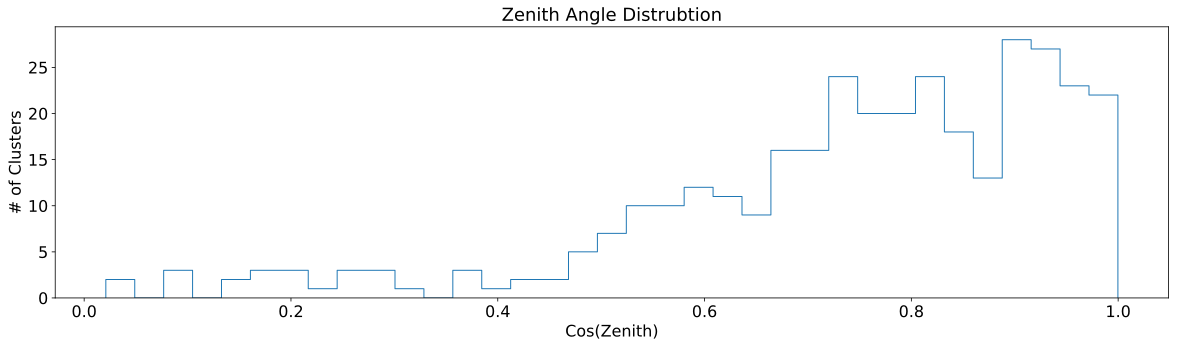

In [34]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([np.cos(x) for x in data.get_clusterdf()['Zenith']], bins=35, histtype='step')
#plt.scatter(cos_theta[:,0], cos_theta[:,1])

plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

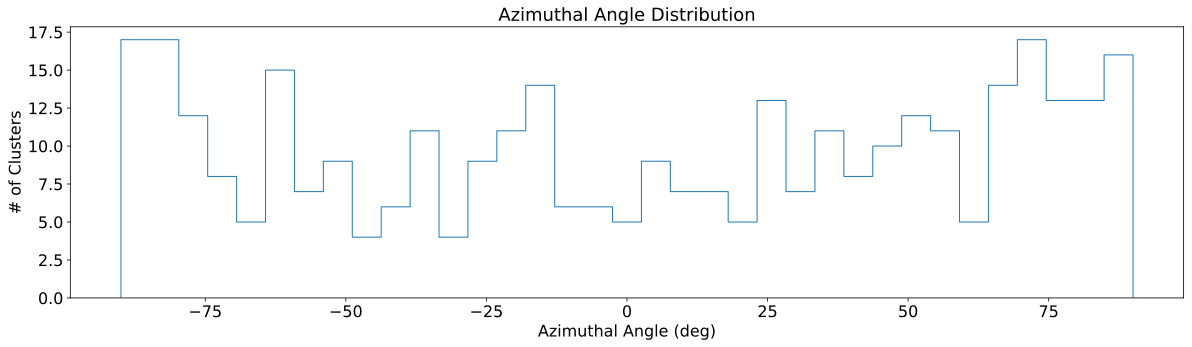

In [35]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (deg)',fontsize=16)

#plt.ylim(0,15)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Azimuth']], np.linspace(-90,90,36), histtype='step')
#plt.scatter(phi[:,0], phi[:,1])


plt.savefig('plots/pdf/Azimuth.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")

Text(0, 0.5, 'cos(theta)')

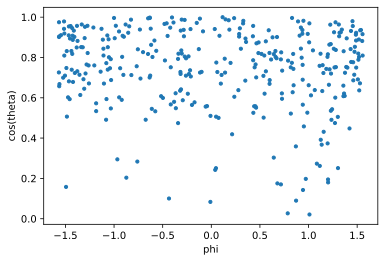

In [36]:
plt.scatter(data.get_clusterdf()['Azimuth'], np.cos(data.get_clusterdf()['Zenith'].values), s=10)
plt.xlabel("phi")
plt.ylabel("cos(theta)")

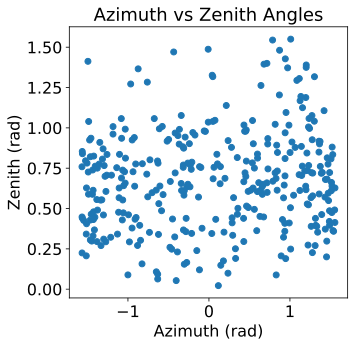

In [37]:
plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth vs Zenith Angles", fontsize=18)
plt.xlabel('Azimuth (rad)',fontsize=16)
plt.ylabel('Zenith (rad)',fontsize=16)

array = plt.scatter(data.get_clusterdf()['Azimuth'], data.get_clusterdf()['Zenith'])

plt.savefig('plots/pdf/Azimuth_vs_Zenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Azimuth_vs_Zenith.png',dpi=300,bbox_inches = "tight")

(0.0, 50000.0)

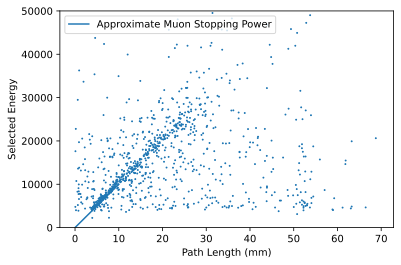

In [53]:
channeldata = data.get_eventdf()[data.get_eventdf()['Channel'] == 819]


quietdata = data.get_eventdf()[(data.get_eventdf()['Baseline'] + data.get_eventdf()['MaxToBaseline']) < 9000]
skim = quietdata[quietdata['PathLength'] < 50]
direct = quietdata[quietdata['PathLength'] > 50]

plt.xlabel("Path Length (mm)")
plt.ylabel("Selected Energy")
plt.scatter(quietdata['PathLength'], quietdata['StabAmp'], s=1)
plt.plot([0,10], [0, 10000], label="Approximate Muon Stopping Power")
plt.legend()

#plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")

plt.ylim(0,.5e5)





#plt.figure()

#plt.xlabel("Path Length (mm)")
#plt.ylabel("Selected Energy")
#plt.scatter(direct['PathLength'], direct['SelectedEnergy'], s=5)
#plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")

(array([ 71.,  81.,  83.,  75., 206., 250.,  55.,  24.,  13.,  14.,  10.,
          8.,   8.,   4.,   1.,   2.,   4.,   2.,   0.,   2.,   3.,   0.,
          1.,   0.,   3.,   0.,   2.,   1.,   0.,   2.,   1.,   1.,   1.,
          0.,   1.,   2.,   0.,   0.,   3.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   2.,   1.]),
 array([    0.        ,   204.08163265,   408.16326531,   612.24489796,
          816.32653061,  1020.40816327,  1224.48979592,  1428.57142857,
         1632.65306122,  1836.73469388,  2040.81632653,  2244.89795918,
         2448.97959184,  2653.06122449,  2857.14285714,  3061.2244898 ,
         3265.30612245,  3469.3877551 ,  3673.46938776,  3877.55102041,
         4081.63265306,  4285.71428571,  4489.79591837,  4693.87755102,
         4897.95918367,  5102.04081633,  5306.12244898,  5510.20408163,
         5714.28571429,  5918.36734694,  6122.44897959,  6326.53061224,
         6530.6122449 ,  6734.69387755,  6938.7755102 ,  7142.85714286,
         7346.93

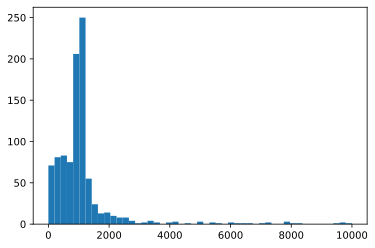

In [62]:
plt.hist(quietdata['StabAmp'] / quietdata['PathLength'], np.linspace(0,1e4,50))

In [39]:
data.get_eventdf()[(data.get_eventdf()['PathLength'] < 1) & (data.get_eventdf()['SelectedEnergy'] < .5e4)]

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,MaxTime,Cluster,Hit,PathLength,dEdx
1843,350265,622,536827.496,1,3.144446,3.141,4977.490090,-5232.213888,3687.959585,6592.212331,False,536830.637,132,True,0.897867,5543.681945
2079,350267,91,636971.272,1,3.150035,3.460,3787.111473,-624.023041,5764.274200,5203.167380,False,636974.732,150,True,0.648779,5837.290762
2813,350269,299,884214.088,1,3.184684,3.175,3073.974846,-3166.914673,1865.950317,3895.656762,False,884217.263,191,True,0.777255,3954.912750
3717,350272,129,1064501.392,1,3.526781,3.132,3272.529744,-5742.176641,1430.328954,4004.067005,False,1064504.524,236,True,0.218102,15004.556043
6336,350282,454,1965392.512,1,3.141635,3.135,3883.207272,-5515.597748,2035.037445,4783.038105,False,1965395.647,396,True,0.073604,52757.751501


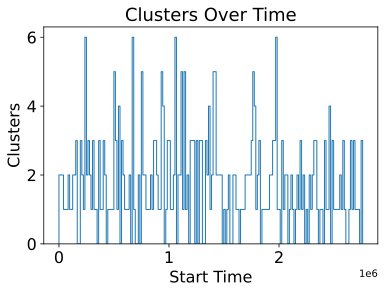

In [40]:
# plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Clusters Over Time", fontsize=18)
plt.ylabel('Clusters',fontsize=16)
plt.xlabel('Start Time',fontsize=16)
array=plt.hist(data.get_clusterdf()['StartTime'], np.linspace(0,2760000,200), histtype='step')
#plt.gca().set_yscale("log")

plt.savefig('plots/pdf/ClusterTimes.pdf',bbox_inches = "tight")
plt.savefig('plots/png/ClusterTimes.png',dpi=300,bbox_inches = "tight")